### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know :

- Which variables are significant in predicting the demands for shred bikes.
- How well those variables describe the bike demands.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Reading,Understanding and Preparation

In [2]:
# Read the Dataset
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Information about the Data
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
#Shape of dataset (No. of rows and columns)
day.shape

(730, 16)

In [5]:
#Seeing the data below we can say that there is no null values in the dataset
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#Drop 'instant' since its just serial no.
#Drop 'atemp' because 'atemp' & 'temp' relation with respect to target variable (cnt) is same.
#Also, 'atemp' is interelated with other variables which might cause problems in later analysis.
#Drop 'workingday' since we can fetch the same data using 'holiday' as well

day = day.drop(['instant','atemp','windspeed','workingday'],axis =1)

In [8]:
#Mapping months's numeric values to its actual value

month_mapping = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
day['month_mapping'] = day.mnth.map(month_mapping)

In [9]:
#Mapping weekday's numeric values to its actual value

weekday_mapping = {0: 'Tuesday', 1: 'Wednesday', 2: 'Thursday', 3: 'Friday', 4: 'Saturday', 5: 'Sunday', 6: 'Monday'}
day['weekday_mapping'] = day.weekday.map(weekday_mapping)

In [10]:
#Mapping season's numeric values to its actual value

season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day['season_mapping'] = day.season.map(season_mapping)

In [11]:
#Mapping weather's numeric values to its actual value

weathersit_mapping={1:"clear_partlycloudy",2:'Mist + Cloudy',3:'Light Snow+Thunderstorm',4:'Heavy Rain + Ice Pallets'}
day['weathersit_mapping'] = day.weathersit.map(weathersit_mapping)

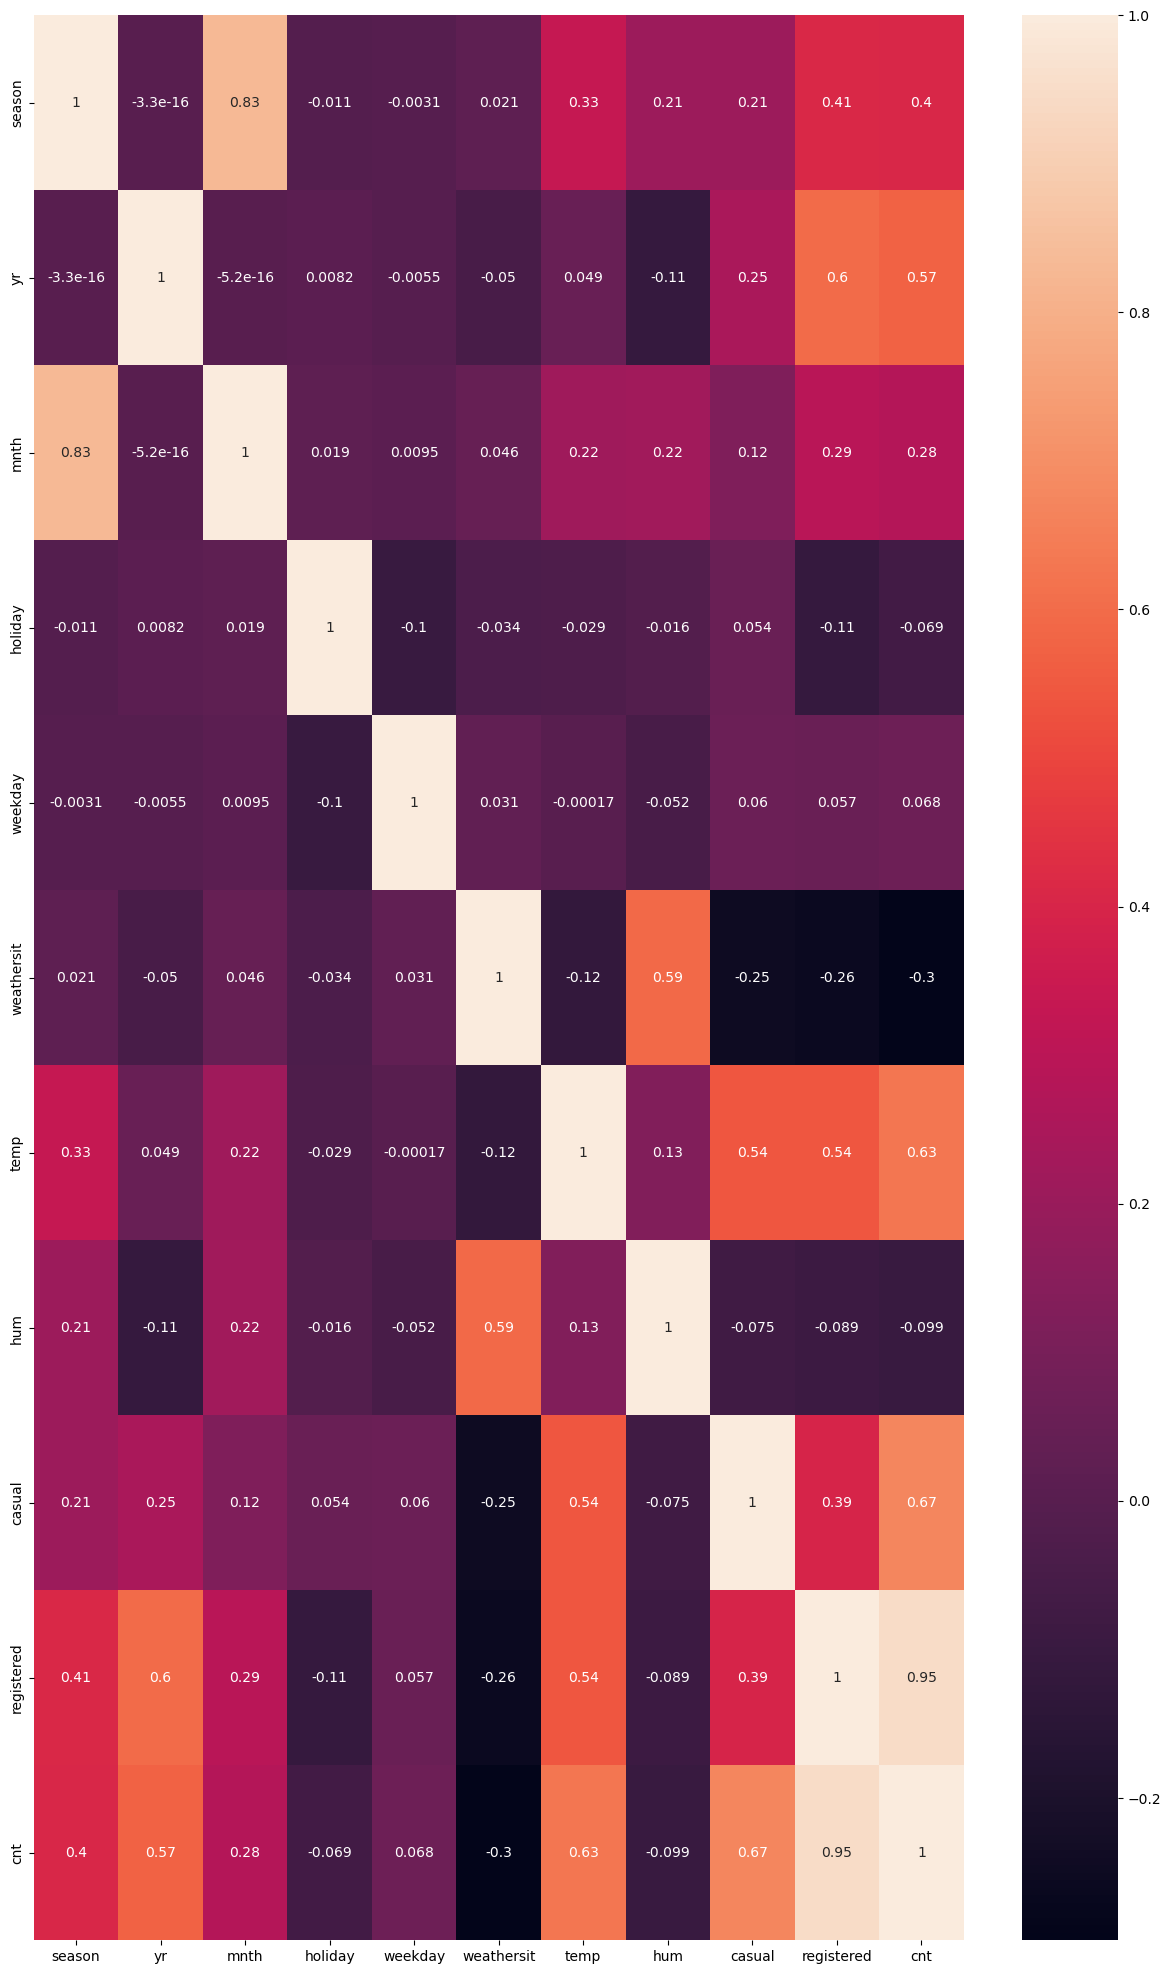

In [12]:
#Plotting heatmap to find the correlation of target variable 'cnt' with other variables
plt.figure(figsize=(15,25))
sns.heatmap(day.corr(),annot =True)
plt.show()

##### Inference:
There is a positive correlation between the target variable "cnt" with 'temp','yr','season', 'casual' and 'registered, based on the above shown correlation values. The target variable "cnt" is a sum of "registered" and "casual" and hence we observe high collinearity among them.

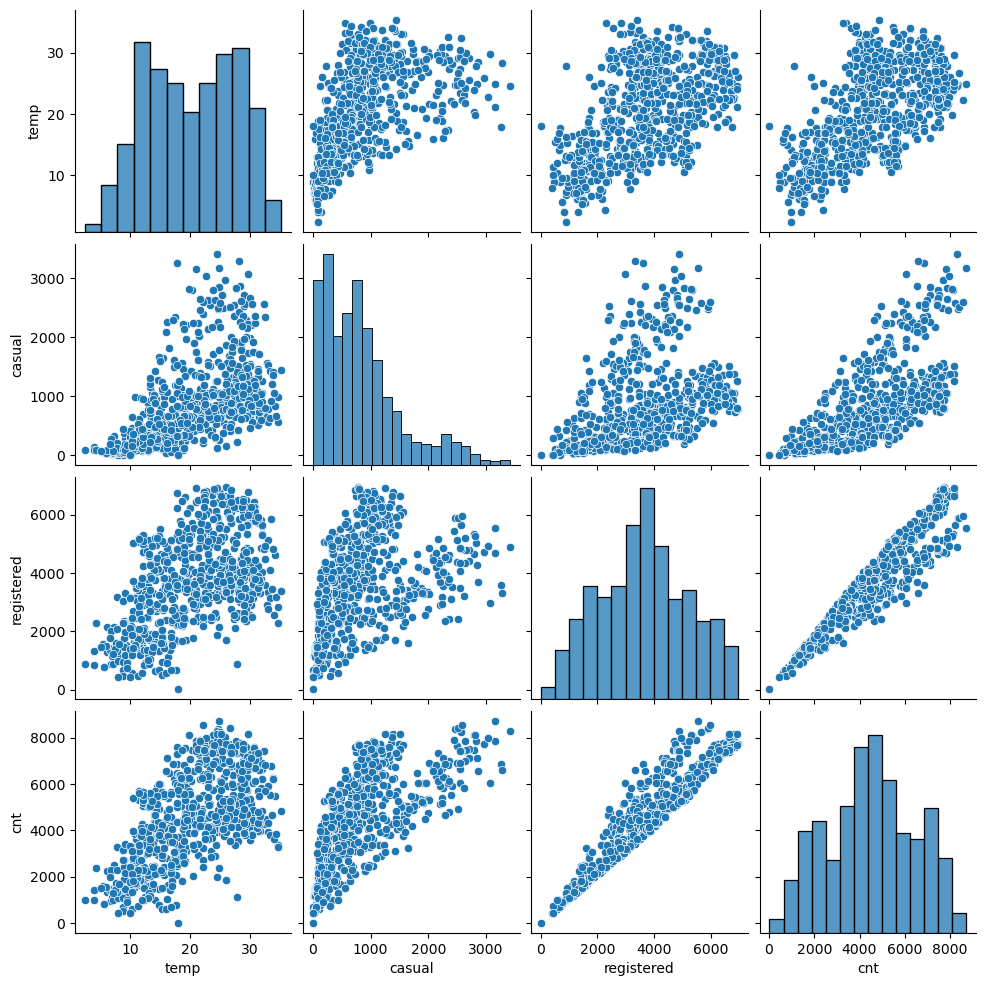

In [13]:
sns.pairplot(day[['temp','casual', 'registered', 'cnt']])
plt.show()

#Seeing the below pairplot we can also say there is no outlier in these columns hence we do not need outlier removal 

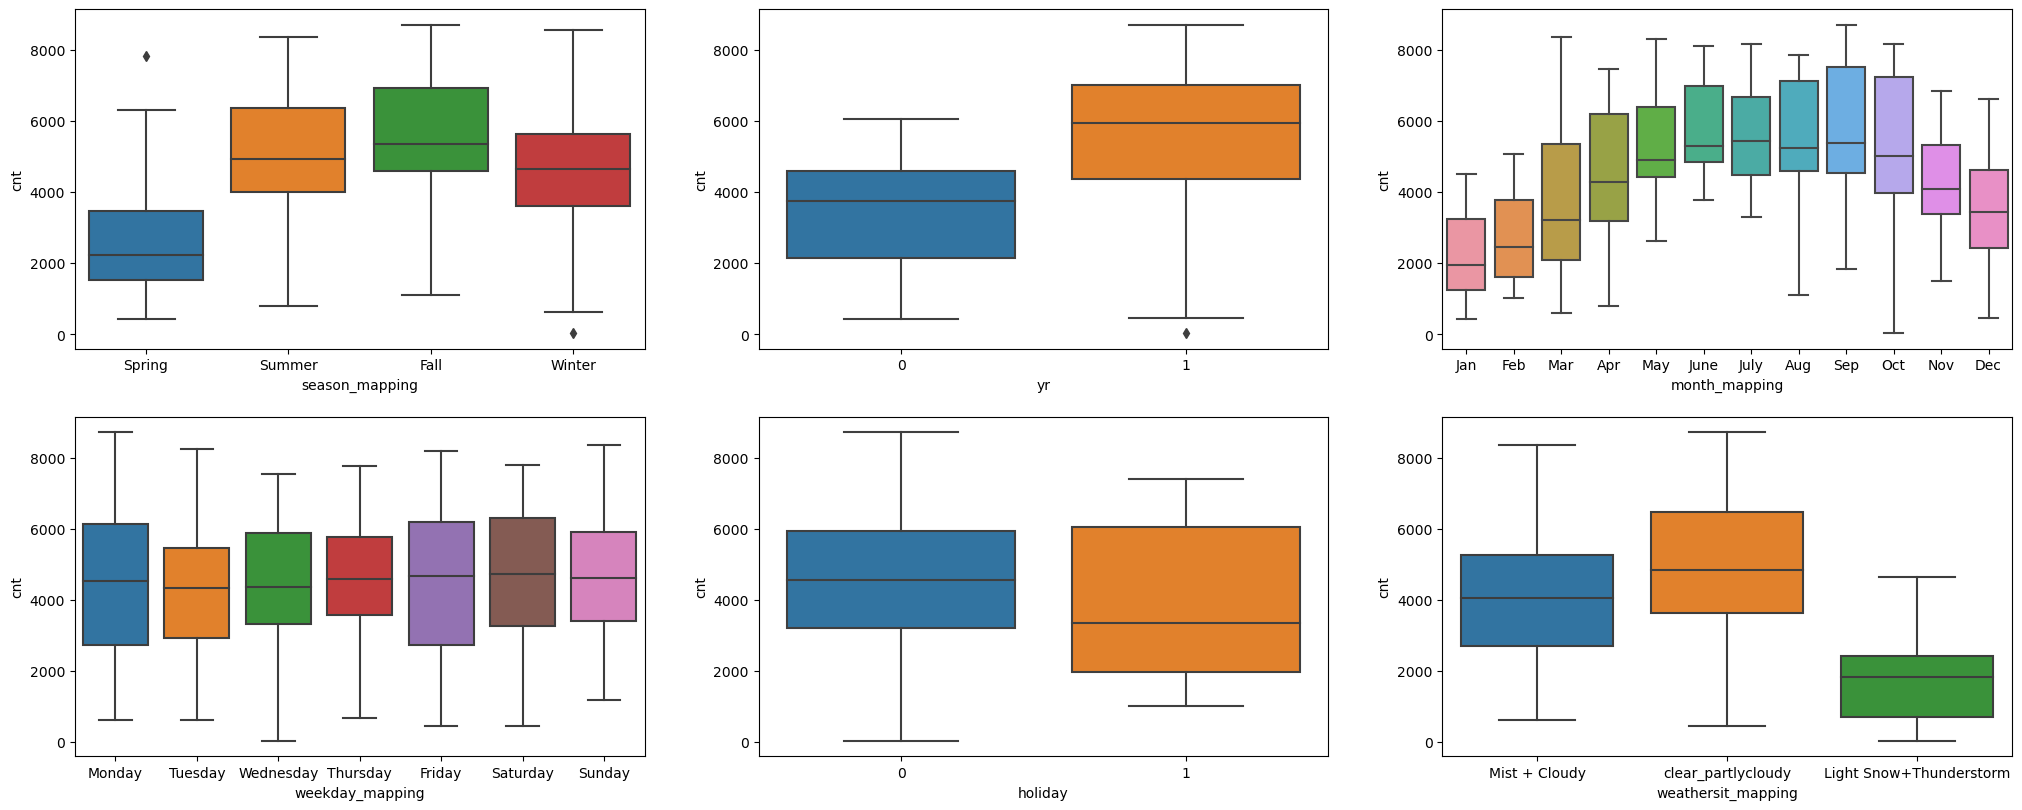

In [14]:
plt.figure(figsize=(25,15))
plt.subplot(3,3,1)
sns.boxplot(x='season_mapping',y='cnt',data=day)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=day)
plt.subplot(3,3,3)
sns.boxplot(x='month_mapping',y='cnt',data=day)
plt.subplot(3,3,4)
sns.boxplot(x='weekday_mapping',y='cnt',data=day)
plt.subplot(3,3,5)
sns.boxplot(x='holiday',y='cnt',data=day)
plt.subplot(3,3,6)
sns.boxplot(x='weathersit_mapping',y='cnt',data=day)
plt.show()

#### Inferences:
- Summer & Fall has maximum no of users
- Year 2019 has much higher booking
- When the weather is Light Snow + Thunderstorm, then people choose not to book the bikes & tend to book when the weather is Clear or Partly cloudy
- Bookings are consistent across the week
- 0 being working day whereas 1 being holiday or weekend does not see much deviation

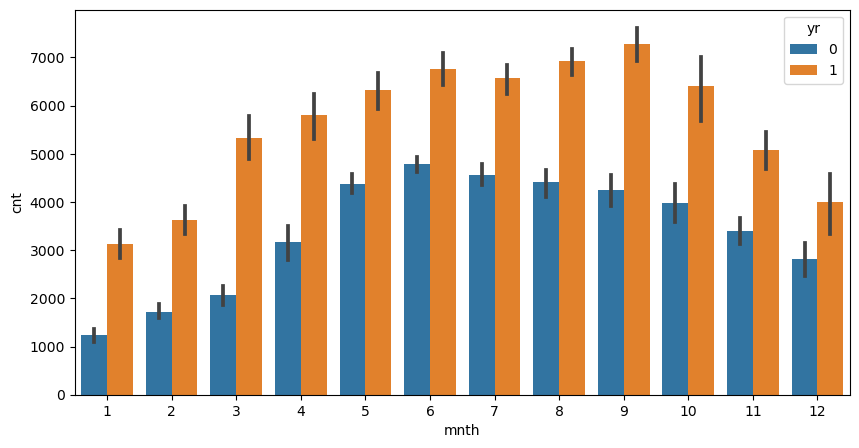

In [15]:
#Relation between month and count for different years (2018 & 2019)
plt.figure(figsize=(10,5))
sns.barplot(x="mnth", y="cnt",hue="yr",data=day)
plt.show()

#### As per above plot, month on month increase of bike rentals follows the same pattern in both the years

In [16]:
#Converting the features "season" into dummy variables so that their effect can be captured in the linear regression model

season_mapping=pd.get_dummies(day['season_mapping'],drop_first=True)
season_mapping

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [17]:
day=pd.concat([day,season_mapping],axis=1)

In [18]:
#Converting the features "mnth" into dummy variables so that their effect can be captured in the linear regression model

month_mapping=pd.get_dummies(day['month_mapping'],drop_first=True)
day=pd.concat([day,month_mapping],axis=1)


In [19]:
#Converting the features "weekday" into dummy variables so that their effect can be captured in the linear regression model

weekday_mapping=pd.get_dummies(day['weekday_mapping'],drop_first=True)
day=pd.concat([day,weekday_mapping],axis=1)


In [20]:
#Converting the features "weathersit" into dummy variables so that their effect can be captured in the linear regression model

weathersit_mapping=pd.get_dummies(day['weathersit_mapping'],drop_first=True)
day=pd.concat([day,weathersit_mapping],axis=1)


In [21]:
#Dropping all the columns above for which we have created dummy variables
#Dropping dteday since a date type column and might not be useful in model training/building

day = day.drop(['mnth','month_mapping','season_mapping','season','weekday', 'weekday_mapping','weathersit', 'weathersit_mapping', 'dteday'],axis =1)

In [22]:
day.head(100)

,yr,holiday,temp,hum,casual,registered,cnt,Spring,Summer,Winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist + Cloudy,clear_partlycloudy
0,0,0,14.110847,80.5833,331,654,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,14.902598,69.6087,131,670,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,8.050924,43.7273,120,1229,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,8.200000,59.0435,108,1454,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,9.305237,43.6957,82,1518,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,16.024153,47.0833,413,2395,2808,0,1,0,...,0,0,0,0,0,0,0,0,0,1
96,0,0,17.937500,60.2917,571,2570,3141,0,1,0,...,0,0,0,1,0,0,0,0,0,1
97,0,0,13.769153,83.6250,172,1299,1471,0,1,0,...,0,0,0,0,1,0,0,0,1,0
98,0,0,14.042500,87.7500,879,1576,2455,0,1,0,...,0,0,1,0,0,0,0,0,1,0


### Splitting the Data into Training and Testing Sets

In [23]:
#Breaking Dataset into training and test data with 80% being training data and 20% being test data
train_df,test_df=train_test_split(day,train_size=0.8,test_size=0.2,random_state=100)

In [24]:
#Rows and columns after split
print(train_df.shape)
print(test_df.shape)

(584, 29)
(146, 29)


### Rescaling the features using MinMax Scaling

In [25]:
#Instantiate an object
scaler = MinMaxScaler()

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 367 to 520
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  584 non-null    int64  
 1   holiday             584 non-null    int64  
 2   temp                584 non-null    float64
 3   hum                 584 non-null    float64
 4   casual              584 non-null    int64  
 5   registered          584 non-null    int64  
 6   cnt                 584 non-null    int64  
 7   Spring              584 non-null    uint8  
 8   Summer              584 non-null    uint8  
 9   Winter              584 non-null    uint8  
 10  Aug                 584 non-null    uint8  
 11  Dec                 584 non-null    uint8  
 12  Feb                 584 non-null    uint8  
 13  Jan                 584 non-null    uint8  
 14  July                584 non-null    uint8  
 15  June                584 non-null    uint8  
 16  Mar   

In [27]:
#Create a list of numeric variables
#Apply scaler() to all the numeric variables

num_vars = ['temp','yr','holiday','casual','registered','cnt']

train_df[num_vars] = scaler.fit_transform(train_df[num_vars])

In [28]:
# Checking training dataframe after scaling
train_df.head()

,yr,holiday,temp,hum,casual,registered,cnt,Spring,Summer,Winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist + Cloudy,clear_partlycloudy
367,1.0,0.0,0.113228,44.1250,0.026516,0.307104,0.254717,1,0,0,...,0,0,0,0,0,1,0,0,0,1
648,1.0,0.0,0.468352,46.3333,0.253581,0.969679,0.868385,0,0,1,...,1,0,0,1,0,0,0,0,0,1
44,0.0,0.0,0.443431,37.5833,0.062786,0.243286,0.217556,1,0,0,...,0,0,0,0,0,0,0,1,0,1
705,1.0,0.0,0.326094,76.4167,0.105760,0.669795,0.573631,0,0,1,...,0,0,0,0,1,0,0,0,1,0
379,1.0,0.0,0.133996,41.9167,0.085949,0.289778,0.263346,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [29]:
# Describe training dataframe after scaling
train_df.describe()

,yr,holiday,temp,hum,casual,registered,cnt,Spring,Summer,Winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist + Cloudy,clear_partlycloudy
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.537414,63.028458,0.257519,0.525317,0.515792,0.251712,0.246575,0.250000,...,0.092466,0.080479,0.150685,0.135274,0.123288,0.133562,0.154110,0.148973,0.342466,0.630137
std,0.500241,0.163378,0.225336,13.995222,0.205577,0.230345,0.225336,0.434369,0.431387,0.433384,...,0.289931,0.272267,0.358048,0.342309,0.329049,0.340472,0.361363,0.356367,0.474941,0.483181
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.340113,52.000000,0.096236,0.352512,0.350696,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.545191,63.437500,0.218379,0.524329,0.522837,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.736512,73.010425,0.333968,0.698924,0.691872,1.000000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,97.041700,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### All the numeric variables are now mapped between 0 and 1

In [30]:
#Divide the data into X and y sets
y_train = train_df.pop('cnt')
X_train = train_df

### Building a Linear Regression Model

In [31]:
# Running RFE with the output number of the variable equal to 19 which is total feature input to the model
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm,n_features_to_select=19)
rfe = rfe.fit(X_train, y_train)

In [32]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('casual', True, 1),
 ('registered', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', False, 9),
 ('Aug', False, 8),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', False, 10),
 ('June', True, 1),
 ('Mar', False, 3),
 ('May', True, 1),
 ('Nov', False, 2),
 ('Oct', False, 7),
 ('Sep', True, 1),
 ('Monday', False, 6),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 5),
 ('Tuesday', False, 4),
 ('Wednesday', True, 1),
 ('Mist + Cloudy', True, 1),
 ('clear_partlycloudy', True, 1)]

In [33]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'casual', 'registered', 'Spring',
       'Summer', 'Dec', 'Feb', 'Jan', 'June', 'May', 'Sep', 'Saturday',
       'Sunday', 'Wednesday', 'Mist + Cloudy', 'clear_partlycloudy'],
      dtype='object')

In [34]:
#adding the constant for "statsmodels" and then fitting the linear model for training dataset
X_train_rfe = X_train[col] 
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_sm).fit() 

In [35]:
#Summary of linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.104e+26
Date:                Sun, 27 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:53:04   Log-Likelihood:                 17009.
No. Observations:                 584   AIC:                        -3.398e+04
Df Residuals:                     564   BIC:                        -3.389e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.561e-15    2.4e-14     -0.065      0.948   -4.87e-14    4.56e-14
yr                 -1.561e-16   7.43e-15     -0.021      0.983   -1.47e-14    1.44e-14
holiday            -6.939e-18   1.51e-14     -0.000      1.000   -2.96e-14    2.96e-14
temp                5.829e-16    1.8e-14      0.032      0.974   -3.48e-14     3.6e-14
hum                 -8.28e-16    2.2e-16     -3.763      0.000   -1.26e-15   -3.96e-16
casual                 0.3775    1.6e-14   2.36e+13      0.000       0.377       0.377
registered             0.7968   2.11e-14   3.78e+13      0.000       0.797       0.797
Spring             -1.006e-16    9.9e-15     -0.010      0.992   -1.96e-14    1.94e-14
Summer             -3.469e-18   7.83e-15     -0.000      1.000   -1.54e-14    1.54e-14
Dec                -2.082e-17   9.67e-15     -0.002      0.998    -1.9e-14     1.9e-14
Feb                 2.602e-16   1.21e-14      0.022      0.983   -2.35e-14     2.4e-14
Jan                 3.816e-17   1.21e-14      0.003      0.997   -2.37e-14    2.38e-14
June                2.984e-16   1.02e-14      0.029      0.977   -1.98e-14    2.04e-14
May                 5.551e-17   1.07e-14      0.005      0.996    -2.1e-14    2.11e-14
Sep                 9.714e-17   9.18e-15      0.011      0.992   -1.79e-14    1.81e-14
Saturday            6.939e-17   7.37e-15      0.009      0.992   -1.44e-14    1.45e-14
Sunday              3.192e-16    7.4e-15      0.043      0.966   -1.42e-14    1.49e-14
Wednesday          -3.053e-16   7.15e-15     -0.043      0.966   -1.43e-14    1.37e-14
Mist + Cloudy       1.318e-16   1.57e-14      0.008      0.993   -3.07e-14    3.09e-14
clear_partlycloudy  4.857e-17   1.69e-14      0.003      0.998   -3.32e-14    3.33e-14
==============================================================================
Omnibus:                        1.546   Durbin-Watson:                   0.088
Prob(Omnibus):                  0.462   Jarque-Bera (JB):                1.419
Skew:                          -0.117   Prob(JB):                        0.492
Kurtosis:                       3.057   Cond. No.                         874.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# X_train_rfe = X_train_rfe.drop(['const'])

In [37]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,registered,27.95
2,temp,20.17
18,clear_partlycloudy,19.11
3,hum,18.92
17,Mist + Cloudy,10.81
0,yr,5.41
4,casual,5.28
6,Spring,4.45
7,Summer,2.72
10,Jan,2.44


In [38]:
#Feature "registered","hum" has high VIF value and hence removing it
#Feature "Mist+cloudy" can be removed since from previous box plot it shows less users in that weather

X_train_new = X_train_rfe.drop(['registered','hum', 'casual', 'Mist + Cloudy'], axis = 1)

In [39]:
X_train_new_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new_sm).fit()

In [40]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     145.6
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          2.59e-183
Time:                        22:53:04   Log-Likelihood:                 502.91
No. Observations:                 584   AIC:                            -973.8
Df Residuals:                     568   BIC:                            -903.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2012      0.021      9.606      0.000       0.160       0.242
yr                     0.2392      0.009     27.622      0.000       0.222       0.256
holiday               -0.0940      0.027     -3.434      0.001      -0.148      -0.040
temp                   0.3188      0.030     10.656      0.000       0.260       0.378
Spring                -0.1469      0.017     -8.648      0.000      -0.180      -0.114
Summer                -0.0234      0.014     -1.640      0.102      -0.052       0.005
Dec                   -0.0319      0.018     -1.785      0.075      -0.067       0.003
Feb                   -0.0306      0.023     -1.361      0.174      -0.075       0.014
Jan                   -0.0584      0.022     -2.615      0.009      -0.102      -0.015
June                   0.0387      0.019      2.031      0.043       0.001       0.076
May                    0.0455      0.020      2.310      0.021       0.007       0.084
Sep                    0.0707      0.017      4.196      0.000       0.038       0.104
Saturday               0.0141      0.013      1.089      0.277      -0.011       0.040
Sunday                 0.0324      0.013      2.406      0.016       0.006       0.059
Wednesday              0.0015      0.013      0.117      0.907      -0.024       0.027
clear_partlycloudy     0.0905      0.009     10.015      0.000       0.073       0.108
==============================================================================
Omnibus:                      118.357   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              404.032
Skew:                          -0.922   Prob(JB):                     1.84e-88
Kurtosis:                       6.633   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.40
3,Spring,3.39
14,clear_partlycloudy,2.68
4,Summer,2.27
7,Jan,2.13
0,yr,2.07
6,Feb,1.94
9,May,1.76
8,June,1.40
13,Wednesday,1.32


#### Now all the features have VIF values lower than 5, indicating that they are not collinear.

### Residual Analysis

In [42]:
X_train_new_sm.head()

,const,yr,holiday,temp,Spring,Summer,Dec,Feb,Jan,June,May,Sep,Saturday,Sunday,Wednesday,clear_partlycloudy
367,1.0,1.0,0.0,0.113228,1,0,0,0,1,0,0,0,0,0,0,1
648,1.0,1.0,0.0,0.468352,0,0,0,0,0,0,0,0,1,0,0,1
44,1.0,0.0,0.0,0.443431,1,0,0,1,0,0,0,0,0,0,1,1
705,1.0,1.0,0.0,0.326094,0,0,1,0,0,0,0,0,0,1,0,0
379,1.0,1.0,0.0,0.133996,1,0,0,0,1,0,0,0,0,0,0,1


In [43]:
X_train_new_sm.shape

(584, 16)

In [44]:
lm.params

const                 0.201221
yr                    0.239205
holiday              -0.094043
temp                  0.318837
Spring               -0.146929
Summer               -0.023442
Dec                  -0.031879
Feb                  -0.030650
Jan                  -0.058368
June                  0.038678
May                   0.045488
Sep                   0.070727
Saturday              0.014144
Sunday                0.032401
Wednesday             0.001503
clear_partlycloudy    0.090530
dtype: float64

In [45]:
y_train_pred=lm.predict(X_train_new_sm)

In [46]:
res=y_train-y_train_pred

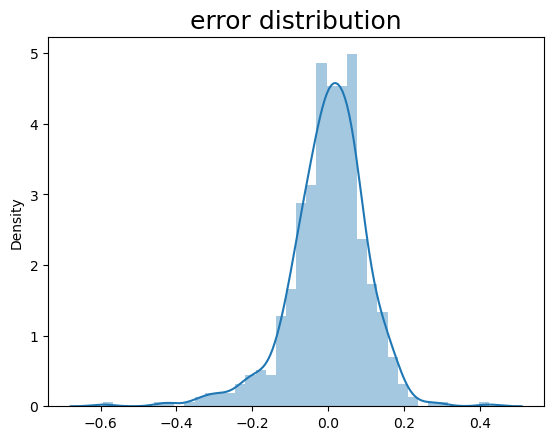

In [47]:
sns.distplot(res)
plt.title('error distribution', fontsize=18)
plt.show()

#### Above plot shows that errors are normally distributed

In [48]:
r2_score(y_true=y_train,y_pred=y_train_pred)

0.7936423555600047

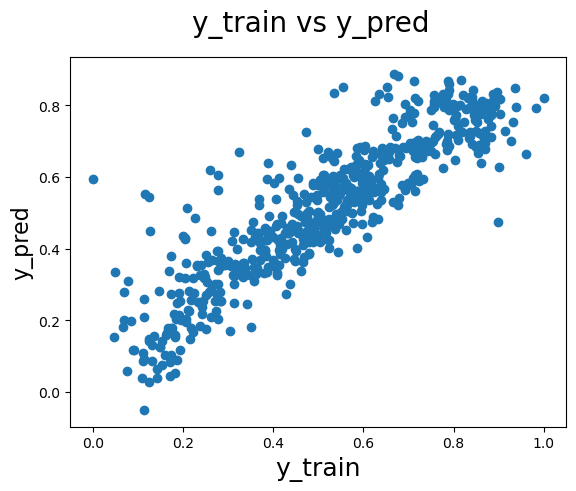

In [49]:
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_train vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)
plt.show()

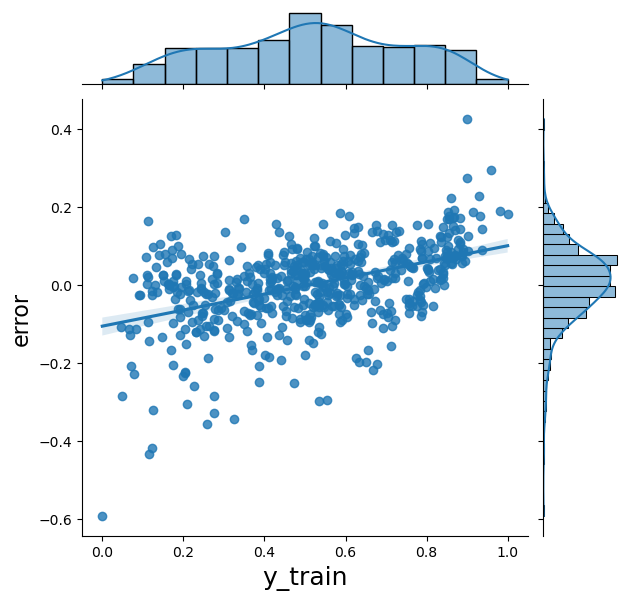

In [50]:
sns.jointplot(x=y_train,y=res,kind=F'reg')
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('error', fontsize=16)
plt.show()

In [51]:
num_vars_test = ['temp','yr','holiday','casual','registered','cnt']

test_df[num_vars_test] = scaler.transform(test_df[num_vars_test])

In [52]:
test_df.describe()

,yr,holiday,temp,hum,casual,registered,cnt,Spring,Summer,Winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist + Cloudy,clear_partlycloudy
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.445205,0.034247,0.569603,61.712045,0.261067,0.525614,0.517368,0.226027,0.273973,0.219178,...,0.054795,0.089041,0.116438,0.171233,0.219178,0.178082,0.102740,0.123288,0.315068,0.650685
std,0.498699,0.182488,0.238088,15.173114,0.223963,0.204079,0.212757,0.419697,0.447530,0.415114,...,0.228362,0.285783,0.321854,0.378009,0.415114,0.383899,0.304664,0.329899,0.466142,0.478395
min,0.000000,0.000000,0.046591,25.416700,0.009753,0.065261,0.055683,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.359075,51.864600,0.092502,0.398823,0.391251,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.560248,59.666700,0.214416,0.528877,0.508916,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.801929,70.895800,0.331759,0.651639,0.649994,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,0.984424,97.250000,1.038708,0.955819,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
y_test = test_df.pop('cnt')
X_test = test_df

### Predicting with lm model against the test dataset

In [54]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new_sm = sm.add_constant(X_test_new)

In [55]:
y_test_pred = lm.predict(X_test_new_sm)

In [56]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7880732061870075

In [57]:
res_test=y_test-y_test_pred

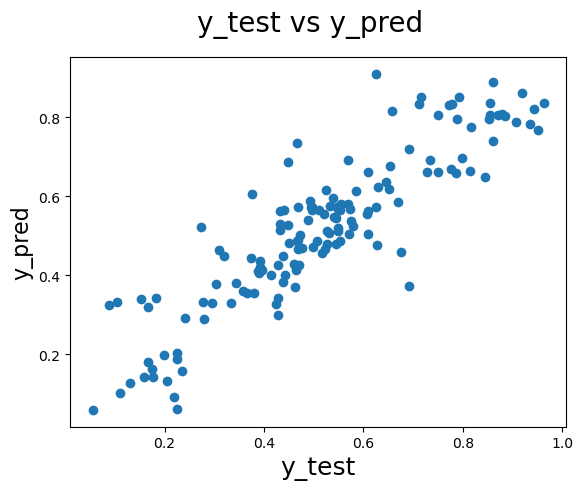

In [58]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)
plt.show()

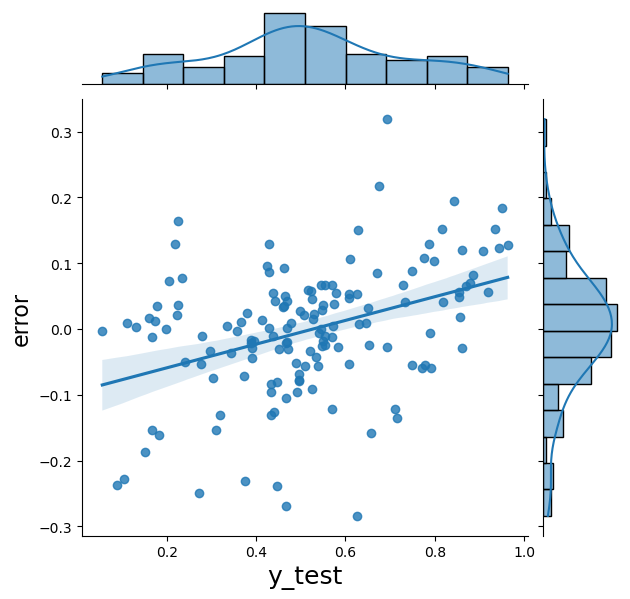

In [59]:
sns.jointplot(x=y_test,y=res_test,kind=F'reg')
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('error', fontsize=16)
plt.show()

R2 score from training dataset: 0.794

R2 score from test dataset:0.788

Complete equation for best fitted line:

cnt = 0.2012 + 0.2392(yr)-0.094(holiday) +0.3188(temp) -0.1469(Spring) -0.0234(Summer) -0.0319(Dec) -0.0306(Feb) -0.0584(Jan) + 0.0387(June)+0.0455(May)+0.0707(Sep)+0.0141(Saturday)+0.0324(Sunday)+0.0015(Wednesday)+0.0905(clear_partlycloudy)

### Interpretation:

- We can see that temperature variable is having the highest coefficient 0.3188, which means if the temperature increases by one unit the number of bike rentals increases by 0.3188 units.
- With the increase in year we see more rentals. As in the dataset we saw a growth in rentals from 2018 to 2019.
- We also see that the weather conditions also affect the bike rentals and is a good contributer